In [28]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
TRAIN_PATH = 'Datasets/trainYX.csv'
TEST_PATH = 'Datasets/testX.csv'

In [30]:
df = pd.read_csv(TRAIN_PATH)

df.head().iloc[:, :5]

,id,y,1,2,3
0,0,3,227,233,237
1,1,8,232,250,252
2,2,3,223,223,237
3,3,8,180,215,228
4,4,8,193,202,214


# Взглянем на изображения

In [78]:
count = 12
width = 32
images = df.iloc[:, 2:].values[:count]

def draw_images(images_bytes: np.ndarray,
                count: int = 6,
                width: int = 32,
                row_count: int = 6) -> None:
    fig = plt.figure(figsize=(count * 12, 12))
    
    for i in range(0, count):
        ax = plt.subplot(1, count, i + 1)
        ax.imshow(images_bytes[i].reshape(width, width).astype('float'), cmap='gray')
        
        plt.xticks([]), plt.yticks([])
    
    plt.tight_layout(pad=0)
    plt.show()

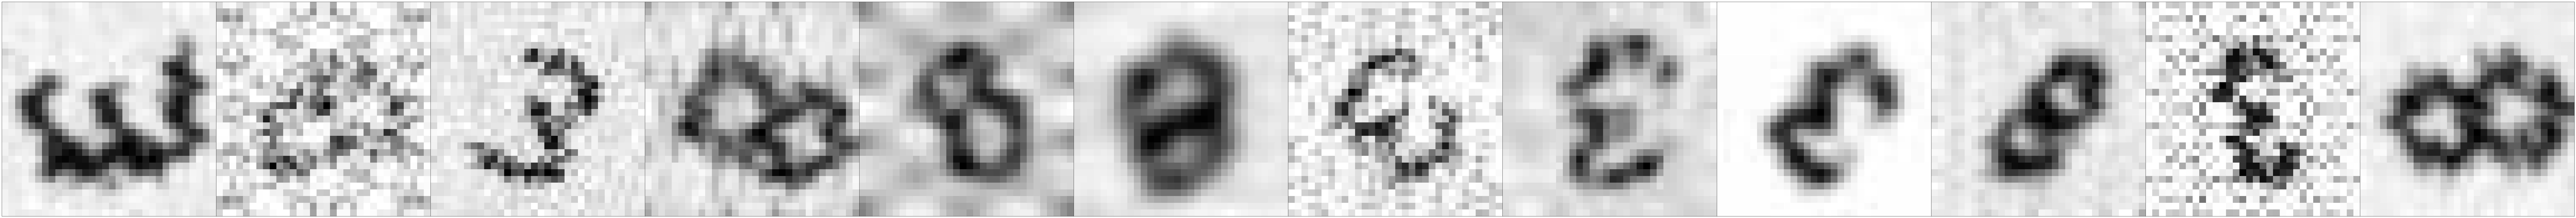

In [79]:
draw_images(images_bytes=images,
            count=count,
            width=width)

In [80]:
images = images.astype('float')
images /= 255.0

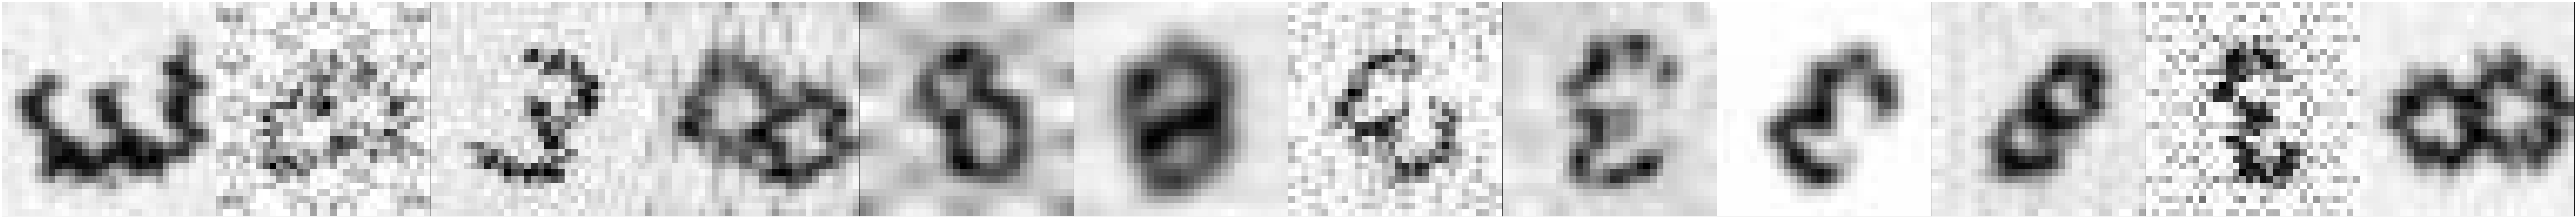

In [81]:
draw_images(images_bytes=images,
            count=count,
            width=width)

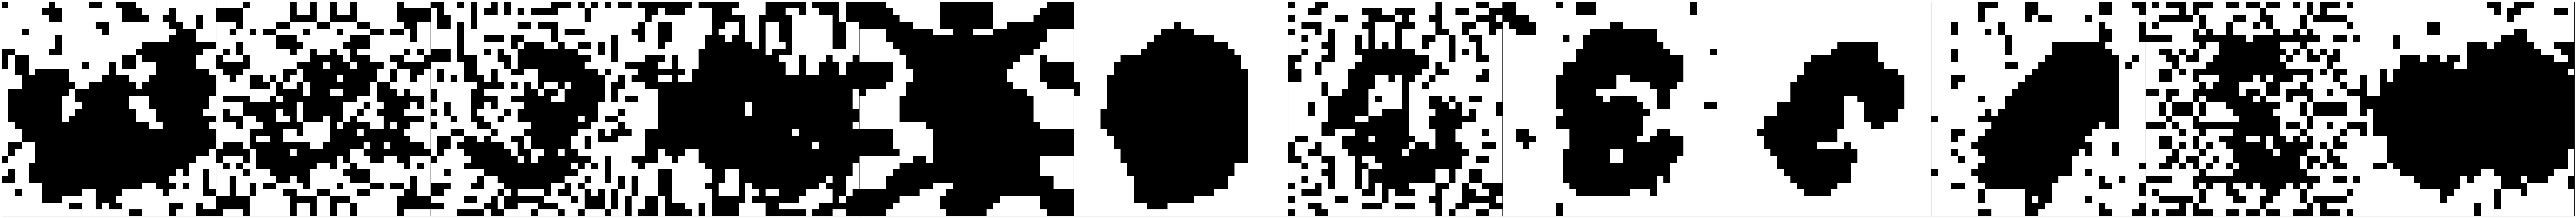

In [82]:
def apply_max_pooling(images_bytes: np.ndarray):
    return np.where(images_bytes >= 0.90, 1.0, 0.0)

transformed_images = apply_max_pooling(images_bytes=images)

draw_images(images_bytes=transformed_images,
            count=count,
            width=width)

In [38]:
images

array([[0.89019608, 0.91372549, 0.92941176, ..., 0.8745098 , 0.89019608,
        0.89803922],
       [0.90980392, 0.98039216, 0.98823529, ..., 0.96862745, 0.98431373,
        0.92941176],
       [0.8745098 , 0.8745098 , 0.92941176, ..., 0.85882353, 0.91372549,
        0.88627451],
       [0.70588235, 0.84313725, 0.89411765, ..., 0.91372549, 0.83921569,
        0.71372549],
       [0.75686275, 0.79215686, 0.83921569, ..., 0.83921569, 0.79607843,
        0.76078431],
       [0.90196078, 0.90588235, 0.90980392, ..., 0.94901961, 0.94901961,
        0.95294118]])

# Взглянем на изображения из тестовой выборки

In [86]:
test_df = pd.read_csv(TEST_PATH)

test_df.head()

,id,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,5000,242,242,242,241,240,239,238,237,235,...,233,233,234,238,238,235,234,236,235,231
1,5001,243,230,235,224,240,227,238,235,232,...,243,229,226,242,247,252,238,222,235,243
2,5002,247,250,254,253,251,248,249,250,245,...,244,247,248,248,247,245,243,243,245,247
3,5003,253,249,246,219,230,234,247,237,225,...,228,243,230,226,226,237,232,228,237,233
4,5004,241,238,233,229,229,231,234,237,239,...,241,235,234,231,228,228,230,234,238,239


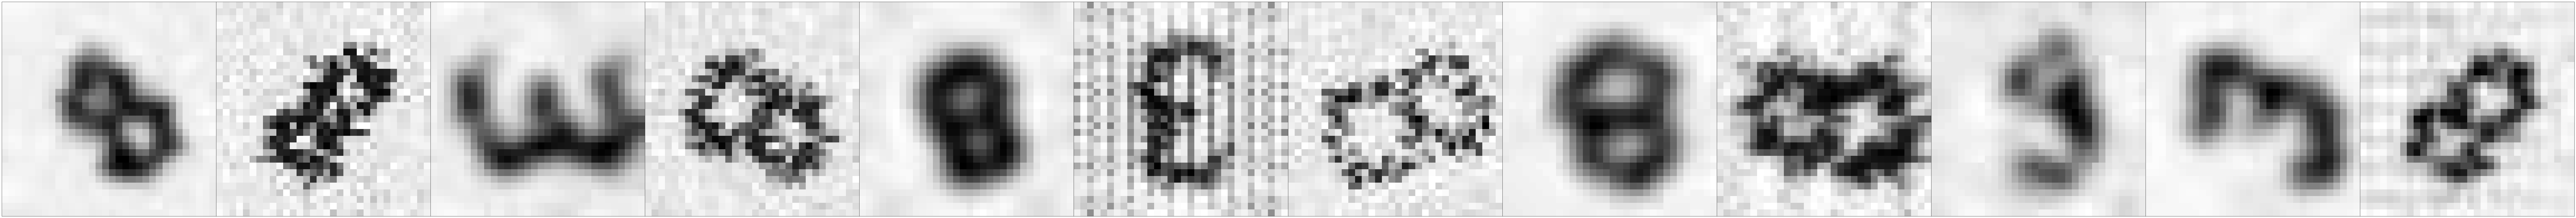

In [88]:
test_images = test_df.iloc[:, 1:].values[:count]

draw_images(images_bytes=test_images,
            count=count,
            width=width)

In [89]:
test_images = test_images.astype('float')
test_images /= 255.0

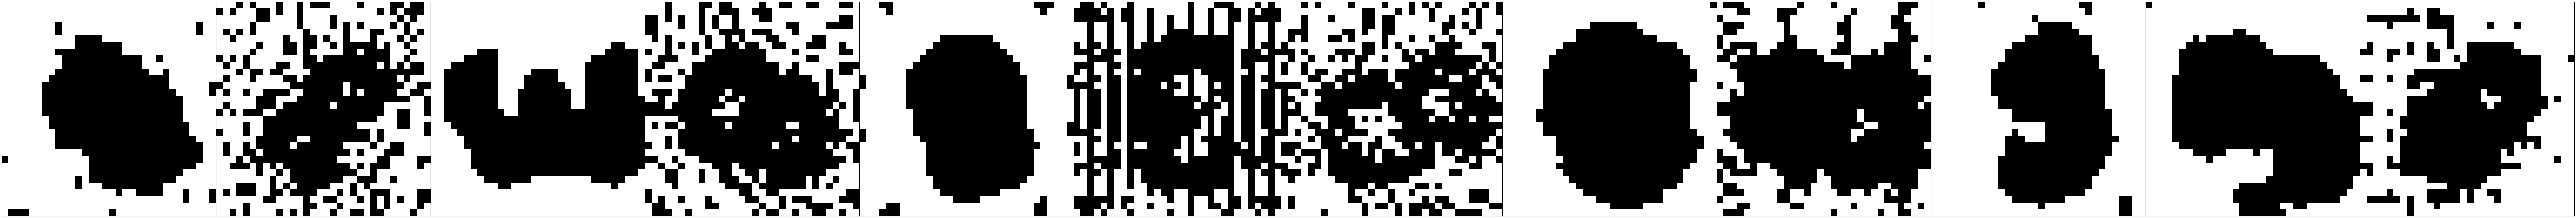

In [90]:
transformed_test_images = apply_max_pooling(test_images)

draw_images(images_bytes=transformed_test_images,
            count=count,
            width=width)

# IDEAS
1. Gaussian blur
2. Additional processing of images